In [338]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [339]:
data = pd.read_csv('titanic_train.csv')
data = data.fillna({'Age': data.Age.median()})
data['Sex'] = (data['Sex'] == 'male').astype(int)

y = data.Survived.astype(int)

In [340]:
dt = DecisionTreeClassifier(
    splitter='best',
    max_depth=3,
    max_leaf_nodes=4,
    min_samples_split=500,
    min_impurity_decrease=0.01
)

In [341]:
dt.fit(data[['Sex', 'SibSp', 'Age']], y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4,
                       min_impurity_decrease=0.01, min_samples_split=500)

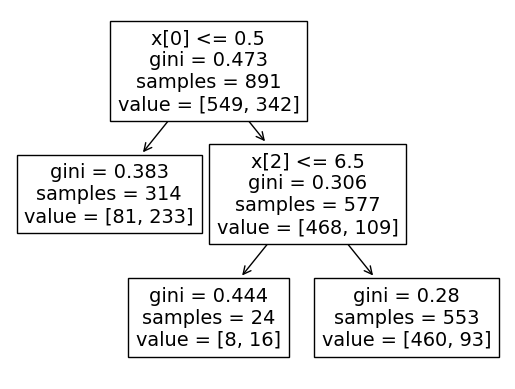

In [342]:
tree.plot_tree(dt)
plt.show()

In [343]:
dt.tree_.threshold

array([ 0.5, -2. ,  6.5, -2. , -2. ])

1993841310
2 0.005 10 0.0


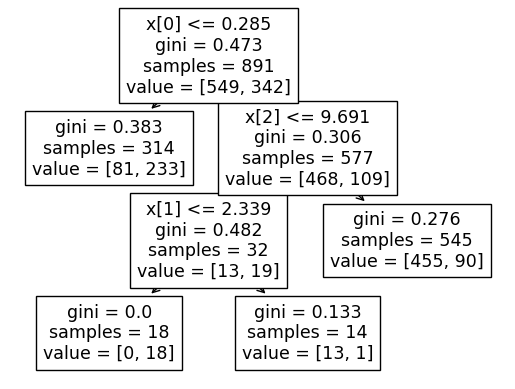

In [354]:
for mss in range(2, 300, 25):
    for mid in (0., 0.001, 0.005, 0.01, 0.05, 0.1):
        for msl in (1, 2, 5, 10, 15, 25, 50, 75, 100, 120, 150, 200, 250, 300):
            for mwf in (0., 0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 0.2):
                rs = np.random.randint(1, 2000000000)
                dt = DecisionTreeClassifier(
                    splitter='random',
                    max_depth=3,
                    max_leaf_nodes=4,
                    min_samples_split=mss,
                    min_impurity_decrease=mid,
                    min_samples_leaf=msl,
                    min_weight_fraction_leaf=mwf,
                    random_state=rs
                )

                dt.fit(data[['Sex', 'SibSp', 'Age']], y)

                right = dt.tree_.children_right[dt.tree_.children_right[0]] == -1
                
                if dt.tree_.node_count != 7 or right:
                    continue
                
                left = dt.tree_.children_left[dt.tree_.children_left[0]] == -1
                right_thresh = dt.tree_.threshold[2]
                f_2 = dt.tree_.feature[2]
                f_3, f_4 = dt.tree_.feature[3], dt.tree_.feature[4]
                if not (f_3 == 1 or f_4 == 1):
                    continue
                    
                if f_3 == 1:
                    sibsp_thresh = dt.tree_.threshold[3]
                else:
                    sibsp_thresh = dt.tree_.threshold[4]
                
                if left and f_2 == 2 and 4.5 < right_thresh < 14.5 and 2 < sibsp_thresh < 3:
                    print(rs)
                    print(mss, mid, msl, mwf)
                    tree.plot_tree(dt)
                    plt.show()

In [355]:
import json
json.dumps({
    'random_state': 1993841310,
    'splitter': 'random',
    'max_depth': 3,
    'max_leaf_nodes': 4,
    'min_impurity_decrease': 0.005,
    'min_samples_leaf': 10
})

'{"random_state": 1993841310, "splitter": "random", "max_depth": 3, "max_leaf_nodes": 4, "min_impurity_decrease": 0.005, "min_samples_leaf": 10}'

In [356]:
dt = DecisionTreeClassifier(random_state=1993841310, splitter='random', max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.005, min_samples_leaf=10)

In [357]:
dt.fit(data[['Sex', 'SibSp', 'Age']], y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4,
                       min_impurity_decrease=0.005, min_samples_leaf=10,
                       random_state=1993841310, splitter='random')

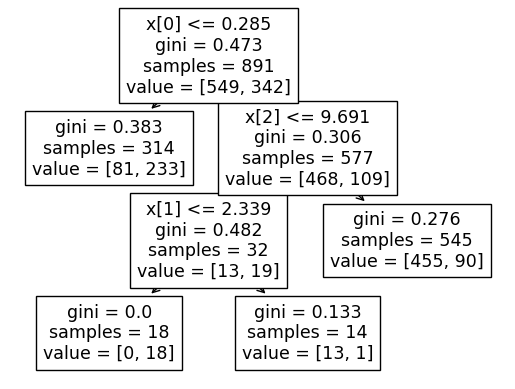

In [358]:
tree.plot_tree(dt)
plt.show()